In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, pydotplus
from sklearn import tree, metrics, model_selection, preprocessing
from IPython.display import Image, display
from mlxtend.plotting import plot_decision_regions

In [2]:
### load iris data

df = pd.read_csv('iris1.csv')
df['Species_label'], _=pd.factorize(df['Species'])
df.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Species_label
0,1,5.1,3.5,1.4,0.2,setosa,0
1,2,4.9,3.0,1.4,0.2,setosa,0
2,3,4.7,3.2,1.3,0.2,setosa,0
3,4,4.6,3.1,1.5,0.2,setosa,0
4,5,5.0,3.6,1.4,0.2,setosa,0


In [3]:
df= df.drop(columns='Unnamed: 0')

In [4]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Species_label
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [5]:
# select features

y = df['Species_label']
x = df[['Petal.Length', 'Petal.Width']]

In [6]:
y


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species_label, Length: 150, dtype: int64

In [7]:
x

,Petal.Length,Petal.Width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [8]:
# split the data randomly into 70% training and 30% test

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x, y, test_size=0.3, random_state=0)

# TRAIN THE MODEL AND MAKE PREDICTIONS
NOTE: WE DIDNT HAVE TO STANDARDIZE THE DATA TO USE A DECISION TREE
    

In [9]:
# Train the decision tree

dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth= 3, random_state=0)
dtree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [10]:
# use the model to predictions with the test data
y_pred = dtree.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0], dtype=int64)

# EVALUATE TH MODELS PERFORMANCE
INCLUDING THE TREES AXIS-PARALLEL DECISION BOUNDARIES AND HOW THE TRESS SPLITS

In [11]:
# HOW DID YOUR MODEL PERFORM

count_misclassified = (Y_test != y_pred).sum()
print('Misclassified Samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(Y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified Samples: 1
Accuracy: 0.98


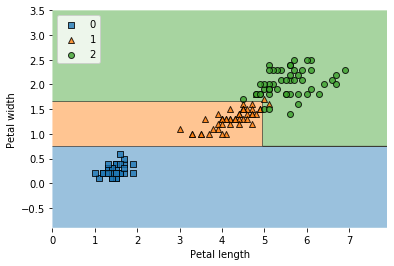

In [12]:
#visualize the models decisions regions to see how it separates the samples

X_combined = np.vstack((X_train, X_test))
Y_combined = np.hstack((Y_train, Y_test))
plot_decision_regions(X=X_combined, y=Y_combined, clf=dtree)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend(loc='upper left')
plt.show()

In [13]:
X_combined

array([[3.5, 1. ],
       [5.5, 1.8],
       [5.7, 2.5],
       [5. , 1.5],
       [5.8, 1.8],
       [3.9, 1.1],
       [6.1, 2.3],
       [4.7, 1.6],
       [3.8, 1.1],
       [4.9, 1.8],
       [5.1, 1.5],
       [4.5, 1.7],
       [5. , 1.9],
       [4.7, 1.4],
       [5.2, 2. ],
       [4.5, 1.6],
       [1.6, 0.2],
       [5.1, 1.9],
       [4.2, 1.3],
       [3.6, 1.3],
       [4. , 1.3],
       [4.6, 1.4],
       [6. , 1.8],
       [1.5, 0.2],
       [1.1, 0.1],
       [5.3, 1.9],
       [4.2, 1.2],
       [1.7, 0.2],
       [1.5, 0.4],
       [4.9, 1.5],
       [1.5, 0.2],
       [5.1, 1.8],
       [3. , 1.1],
       [1.4, 0.3],
       [4.5, 1.5],
       [6.1, 2.5],
       [4.2, 1.3],
       [1.4, 0.1],
       [5.9, 2.1],
       [5.7, 2.3],
       [5.8, 2.2],
       [5.6, 2.1],
       [1.6, 0.2],
       [1.6, 0.2],
       [5.1, 2. ],
       [5.7, 2.1],
       [1.3, 0.3],
       [5.4, 2.3],
       [1.4, 0.2],
       [5. , 2. ],
       [5.4, 2.1],
       [1.3, 0.2],
       [1.4,

In [14]:
Y_combined

array([1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1,
       2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0,
       2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1,
       1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0, 2, 1, 0, 2, 0,
       2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0, 0,
       1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0], dtype=int64)

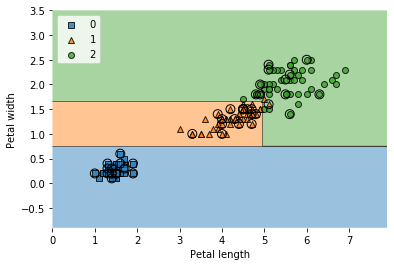

In [24]:
X= np.array((X_test))
plot_decision_regions(X=X_combined, y=Y_combined, clf=dtree, X_highlight= X)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend(loc='upper left')
plt.show()

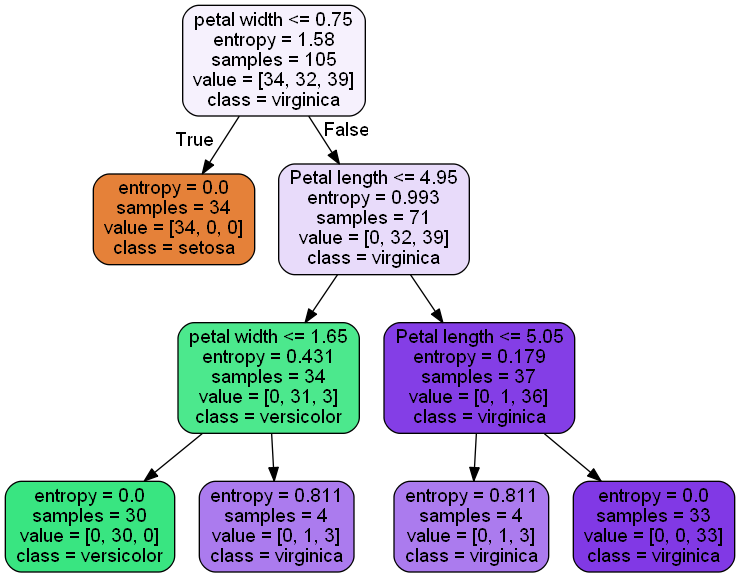

In [16]:
dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, rounded= True,
                                feature_names=['Petal length', 'petal width'],
                                class_names=['setosa', 'versicolor', 'virginica'])
graph= pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))